In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter


In [4]:
file_path = "fr-train.tsv"
df = pd.read_csv(file_path, sep="\t")


In [5]:
df.head()


,id,speaker,sex,text,text_en,power,orientation,populism
0,FR02002,90cc602a5737ae27d183a65926efa8ec,F,"Cet amendement, que vous aviez déjà déposé l’a...","This amendment, which you tabled last year, Ms...",1.0,NaN,2.0
1,FR02003,02023cd024bcc60e049a6bc4cd4273ca,M,Je ne partage pas votre appréciation de l’arti...,I do not agree with your assessment of Article...,1.0,NaN,2.0
2,FR02004,f10b991b874cfb53c9aff0ebd9128848,M,Le présent amendement vise à intégrer au conse...,The purpose of this amendment is to include on...,1.0,1.0,1.0
3,FR02005,80f3200f14d775ca9e276360e2d185cb,M,J’aimerais que nous débattions sur le fond de ...,I would like us to discuss the substance of th...,1.0,1.0,1.0
4,FR02006,61167c3bf1d0d80919e0578c43f61db6,F,"Essayons de trouver la voie de l’apaisement, d...","Let's try to find the way to appeasement, reas...",1.0,NaN,2.0


In [6]:
df.isna().sum()

id                0
speaker           0
sex               0
text              0
text_en           0
power          1146
orientation    4415
populism        881
dtype: int64

In [7]:
df["sex"].value_counts(normalize=True)


sex
M    0.595568
F    0.404432
Name: proportion, dtype: float64

In [8]:
df["power"].value_counts().sort_index()


power
0.0    2767
1.0    4751
Name: count, dtype: int64

In [9]:
df["power"].value_counts().sort_index()


power
0.0    2767
1.0    4751
Name: count, dtype: int64

In [10]:
df["populism"].value_counts().sort_index()


populism
1.0     874
2.0    6595
4.0     314
Name: count, dtype: int64

In [11]:
df["text_len"] = df["text"].str.len()
df["text_len"].describe()


count     8664.000000
mean      1750.828601
std       1554.071809
min        500.000000
25%        795.000000
50%       1241.000000
75%       2020.250000
max      17114.000000
Name: text_len, dtype: float64

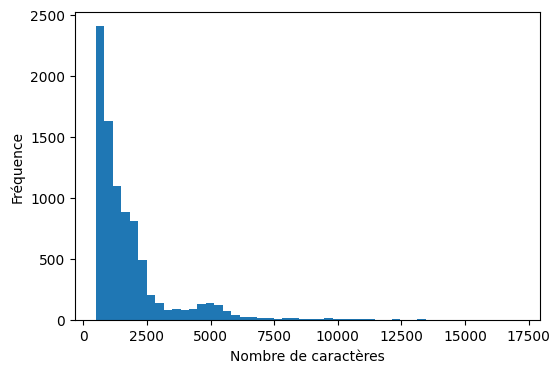

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df["text_len"], bins=50)
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()


In [13]:
df.groupby("populism")["text_len"].mean()


populism
1.0    2042.878719
2.0    1684.826232
4.0    1801.659236
Name: text_len, dtype: float64

In [14]:
def clean_text(t):
    t = re.sub(r"<[^>]+>", " ", t)
    t = re.sub(r"\s+", " ", t)
    return t.lower().strip()

df["clean_text"] = df["text"].astype(str).apply(clean_text)


In [15]:
df["word_count"] = df["clean_text"].apply(lambda x: len(x.split()))
df["word_count"].describe()


count    8664.000000
mean      273.745729
std       241.961099
min        68.000000
25%       125.000000
50%       196.000000
75%       315.000000
max      2937.000000
Name: word_count, dtype: float64

In [16]:
df.groupby("populism")["word_count"].mean()


populism
1.0    317.319222
2.0    263.096285
4.0    289.283439
Name: word_count, dtype: float64

In [17]:
all_words = " ".join(df["clean_text"]).split()
Counter(all_words).most_common(20)


[('de', 140232),
 ('la', 78454),
 ('le', 54120),
 ('à', 52467),
 ('et', 50825),
 ('les', 49947),
 ('des', 48132),
 ('en', 36496),
 ('que', 29508),
 ('du', 24329),
 ('pour', 23500),
 ('nous', 23348),
 ('qui', 20240),
 ('dans', 20108),
 ('un', 19436),
 ('une', 17484),
 ('ce', 16207),
 ('est', 15419),
 ('pas', 15325),
 ('sur', 14812)]

In [18]:
def top_words_by_label(label, n=15):
    words = " ".join(df[df["populism"] == label]["clean_text"]).split()
    return Counter(words).most_common(n)

top_words_by_label(1)


[('de', 16556),
 ('la', 9489),
 ('et', 6341),
 ('le', 6234),
 ('à', 6109),
 ('des', 5865),
 ('les', 5534),
 ('en', 4326),
 ('que', 3352),
 ('du', 2982),
 ('nous', 2917),
 ('pour', 2674),
 ('qui', 2316),
 ('dans', 2279),
 ('un', 2126)]